In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set('fivethirtyeight')
plt.style.use('fivethirtyeight') 
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
path = ''

In [12]:
data_df = pd.read_csv('cleaned_data.csv')

In [13]:
data_df.shape

(780, 28)

In [14]:
data_df.head()

,Country,Year,Top_1,Tax_Rev_to_GDP,Individual_Spending_Rate,Society_Spending_Rate,Top_Rate,1100,1200,1300,...,4500,4600,5100,5110,5111,5120,5121,5200,5300,6000
0,Australia,1965,0.0634,20.620,NaN,NaN,NaN,34.414809,16.281847,0.0,...,0.0,0.0,30.015924,7.364650,0.0,22.651274,15.545382,4.697452,0.0,0.0
1,Australia,1966,0.0616,19.840,NaN,NaN,NaN,35.646688,14.974949,0.0,...,0.0,0.0,29.708666,7.069957,0.0,22.638708,15.661533,4.768974,0.0,0.0
2,Australia,1967,0.0625,20.419,NaN,NaN,NaN,36.493289,14.429530,0.0,...,0.0,0.0,29.312081,6.996644,0.0,22.315436,14.983221,4.731544,0.0,0.0
3,Australia,1968,0.0605,20.349,NaN,NaN,NaN,35.685333,15.613271,0.0,...,0.0,0.0,28.869539,7.416304,0.0,21.453235,14.157033,4.698994,0.0,0.0
4,Australia,1969,0.0592,20.691,NaN,NaN,NaN,37.413183,15.686018,0.0,...,0.0,0.0,27.781418,7.456428,0.0,20.324990,12.829249,4.403093,0.0,0.0


In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 28 columns):
Country                     780 non-null object
Year                        780 non-null int64
Top_1                       648 non-null float64
Tax_Rev_to_GDP              774 non-null float64
Individual_Spending_Rate    548 non-null float64
Society_Spending_Rate       548 non-null float64
Top_Rate                    255 non-null float64
1100                        774 non-null float64
1200                        774 non-null float64
1300                        774 non-null float64
2100                        774 non-null float64
2200                        774 non-null float64
2300                        774 non-null float64
2400                        774 non-null float64
4100                        774 non-null float64
4200                        774 non-null float64
4300                        774 non-null float64
4400                        774 non-null float64
4500            

In [2]:
data_df.columns

NameError: name 'data_df' is not defined

In [7]:
countries = data_df.Country.unique()
print(len(countries))
print(countries)

15
['Australia' 'Denmark' 'France' 'Germany' 'Ireland' 'Italy' 'Japan'
 'New Zealand' 'Norway' 'Spain' 'Sweden' 'Switzerland' 'United States'
 'United Kingdom' 'Canada']


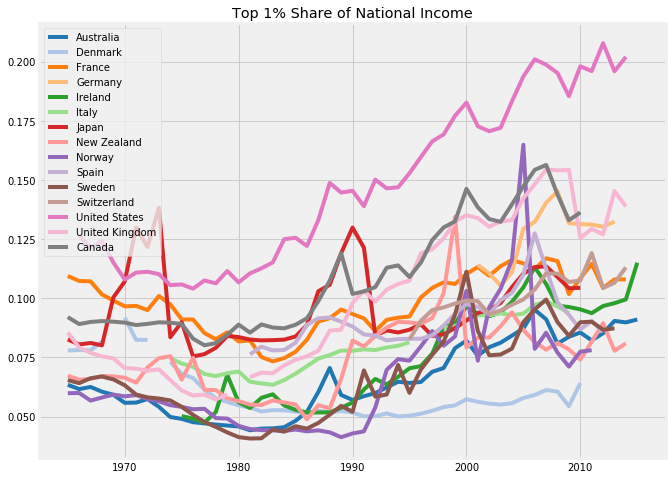

In [21]:
years = data_df.Year.unique()
colors = list(plt.cm.tab20(np.arange(15)))
plt.figure(figsize=(10, 8))

for i, country in enumerate(countries):
    plt.plot(years, data_df[data_df['Country'] == country]
             .Top_1, color=colors[i])

plt.legend(countries)

plt.title('Top 1% Share of National Income')
plt.show()

In [31]:
countries_trim = ['United States', 'Denmark', 'Australia', 
                 'United Kingdom']

In [32]:
uk_top_1 = data_df[data_df['Country'] == 'United Kingdom'].Top_1.interpolate()
denmark_top_1 = data_df[data_df['Country'] == 'Denmark'].Top_1.interpolate()

In [33]:
data_df[data_df['Country'] == 'United Kingdom'].loc[:, 'Top_1'] = uk_top_1
data_df[data_df['Country'] == 'Denmark'].loc[:, 'Top_1'] = denmark_top_1

/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
test_df = data_df.fillna(method='ffill')

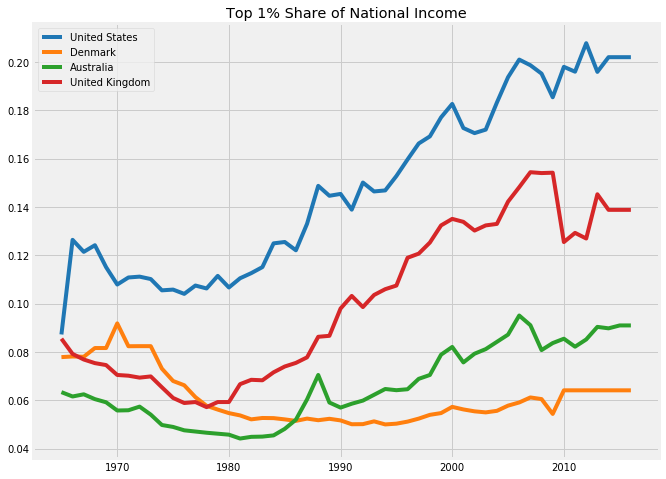

In [35]:
plt.figure(figsize=(10, 8))


for i, country in enumerate(countries_trim):
    plt.plot(years, test_df[data_df['Country'] == country]
             .Top_1, color=colors[i])

plt.legend(countries_trim)

plt.title('Top 1% Share of National Income')
plt.show()

In [30]:
for country in countries:
    print(country)
    print(data_df[data_df['Country'] == country].describe())


Australia
              Year  National_Income_Top_1        GDP       1100       1200  \
count    52.000000              51.000000  52.000000  52.000000  52.000000   
mean   1990.500000               0.065616  25.867115  40.334635  14.495674   
std      15.154757               0.015546   4.687464   6.538199   3.881571   
min    1965.000000               0.044200   0.000000   0.000000   0.000000   
25%    1977.750000               0.053050  25.303500  38.491409  12.139836   
50%    1990.500000               0.062300  26.854500  41.117312  14.863052   
75%    2003.250000               0.081000  28.513000  44.138034  16.591251   
max    2016.000000               0.095100  30.377000  46.608610  22.584736   

       1300  2100  2200  2300  2400  ...   4500  4600       5100       5110  \
count  52.0  52.0  52.0  52.0  52.0  ...   52.0  52.0  52.000000  52.000000   
mean    0.0   0.0   0.0   0.0   0.0  ...    0.0   0.0  25.244620   9.072494   
std     0.0   0.0   0.0   0.0   0.0  ...    0.0   

              Year  National_Income_Top_1        GDP       1100       1200  \
count    52.000000              49.000000  52.000000  52.000000  52.000000   
mean   1990.500000               0.147344  25.393000  37.136705   9.660334   
std      15.154757               0.034426   1.206995   2.437122   2.819186   
min    1965.000000               0.104060  23.017000  31.668882   5.727794   
25%    1977.750000               0.112640  24.415500  35.346404   7.564880   
50%    1990.500000               0.145420  25.558000  37.064797   8.832773   
75%    2003.250000               0.177090  26.027000  38.900815  11.408060   
max    2016.000000               0.207790  28.202000  42.544527  17.354742   

       1300       2100       2200       2300  2400    ...      4500  \
count  52.0  52.000000  52.000000  52.000000  52.0    ...      52.0   
mean    0.0   9.707353  11.841927   1.069753   0.0    ...       0.0   
std     0.0   1.768728   1.748030   0.281839   0.0    ...       0.0   
min     0.0  

In [32]:
test = data_df[data_df['Country'] == 'Denmark']

In [38]:
test.loc[57, 'National_Income_Top_1'] = np.NaN
test.National_Income_Top_1

/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


52     0.077892
53     0.078149
54     0.078028
55     0.081649
56          NaN
57          NaN
58     0.082393
59     0.082427
60          NaN
61     0.073104
62     0.068010
63     0.066246
64     0.061330
65     0.057743
66     0.056179
67     0.054718
68     0.053768
69     0.052137
70     0.052704
71     0.052644
72     0.052123
73     0.051506
74     0.052447
75     0.051779
76     0.052362
77     0.051699
78     0.050115
79     0.050155
80     0.051312
81     0.050038
82     0.050348
83     0.051198
84     0.052441
85     0.054004
86     0.054728
87     0.057301
88     0.056241
89     0.055454
90     0.055019
91     0.055657
92     0.057812
93     0.059127
94     0.061202
95     0.060518
96     0.054375
97     0.064146
98          NaN
99          NaN
100         NaN
101         NaN
102         NaN
103         NaN
Name: National_Income_Top_1, dtype: float64

In [39]:
test.interpolate().National_Income_Top_1

52     0.077892
53     0.078149
54     0.078028
55     0.081649
56     0.081897
57     0.082145
58     0.082393
59     0.082427
60     0.077765
61     0.073104
62     0.068010
63     0.066246
64     0.061330
65     0.057743
66     0.056179
67     0.054718
68     0.053768
69     0.052137
70     0.052704
71     0.052644
72     0.052123
73     0.051506
74     0.052447
75     0.051779
76     0.052362
77     0.051699
78     0.050115
79     0.050155
80     0.051312
81     0.050038
82     0.050348
83     0.051198
84     0.052441
85     0.054004
86     0.054728
87     0.057301
88     0.056241
89     0.055454
90     0.055019
91     0.055657
92     0.057812
93     0.059127
94     0.061202
95     0.060518
96     0.054375
97     0.064146
98     0.064146
99     0.064146
100    0.064146
101    0.064146
102    0.064146
103    0.064146
Name: National_Income_Top_1, dtype: float64

### USA Only

In [12]:
usa_df = data_df[data_df['Country'] == 'United States']

AttributeError: 'DataFrame' object has no attribute 'Top_Marginal_Rate'

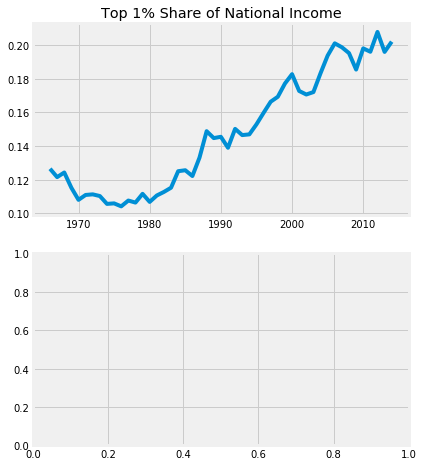

In [13]:
plt.figure(figsize=(6, 12))

plt.subplot(3,1,1)
plt.plot(usa_df.Year, usa_df.National_Income_Top_1)
plt.title('Top 1% Share of National Income')

plt.subplot(3,1,2)
plt.plot(usa_df.Year, usa_df.Top_Marginal_Rate)
plt.title('Top Marginal Income Tax Rate')
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
plt.plot(usa_df.Year, usa_df.Value)
plt.title('Tax Revenue as % of GDP')

### Time Series Analysis

In [51]:
usa_time = usa_df

In [52]:
usa_time['Year'] = pd.date_range(start='1/1/1966', end='1/1/2014', periods=49)

In [54]:
usa_time.set_index('Year', inplace=True)
usa_time.head()

,Country,National_Income_Top_1,Top_Marginal_Rate,Value,1100,1200,1300,2000,2100,2200,...,4500,4600,5100,5110,5111,5120,5121,5200,5300,6000
Year,,,,,,,,,,,,,,,,,,,,,
1966-01-01 00:00:00,USA,0.12641,70.00,23.767,32.366109,17.257410,0.0,13.759170,5.489479,7.771478,...,0.0,0.0,18.337140,4.982130,0.0,13.355010,10.999919,2.824282,0.0,0.0
1967-01-01 06:00:00,USA,0.12145,70.00,24.844,32.308931,17.354742,0.0,15.786496,6.424965,8.510047,...,0.0,0.0,17.437205,4.880212,0.0,12.556993,10.237946,2.589931,0.0,0.0
1968-01-01 12:00:00,USA,0.12419,75.25,24.288,34.797803,14.263367,0.0,15.602658,6.526761,8.369659,...,0.0,0.0,17.948706,5.348019,0.0,12.600687,10.253724,2.711517,0.0,0.0
1968-12-31 18:00:00,USA,0.11511,77.00,26.606,36.793030,15.243930,0.0,15.062646,6.349534,8.057200,...,0.0,0.0,16.930561,5.388422,0.0,11.542139,9.311656,2.323420,0.0,0.0
1970-01-01 00:00:00,USA,0.10793,71.75,25.721,36.594550,13.214106,0.0,16.086974,6.911866,8.473333,...,0.0,0.0,17.581949,5.846556,0.0,11.735393,9.460949,2.370206,0.0,0.0


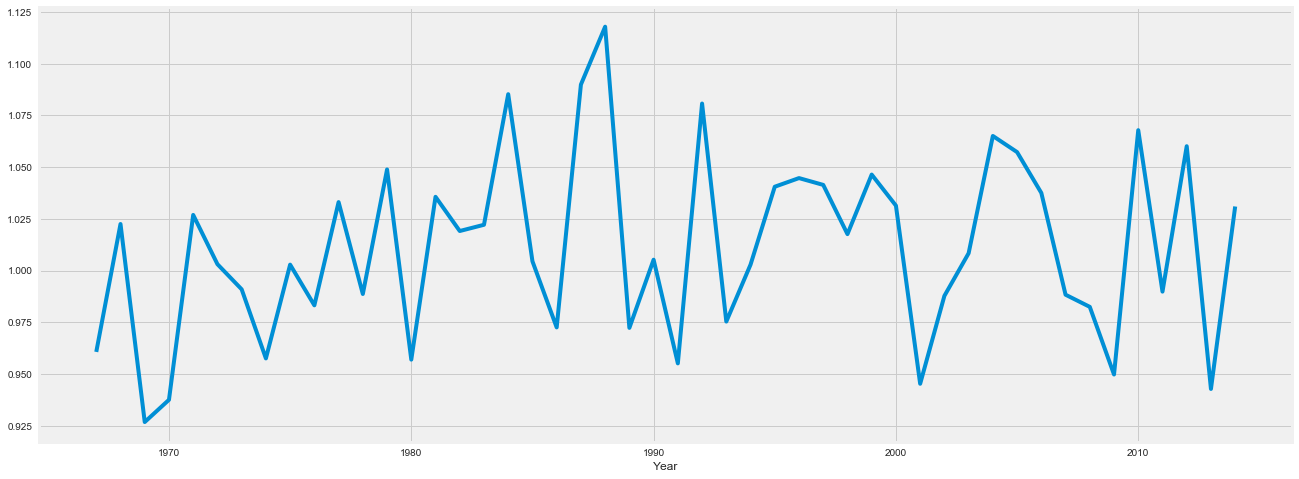

In [55]:
usa_time['Change'] = usa_time.National_Income_Top_1.div(
    usa_time.National_Income_Top_1.shift())
usa_time['Change'].plot(figsize=(20,8))

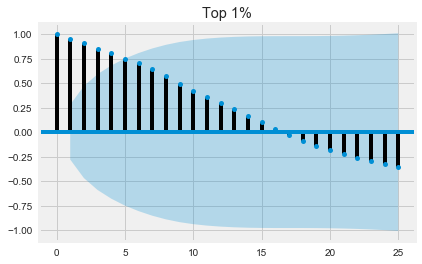

In [63]:
# Autocorrelation of income
#plot_acf(white_noise,lags=15)
plot_acf(usa_time['National_Income_Top_1'],lags=25,title="Top 1%")
plt.show()

/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


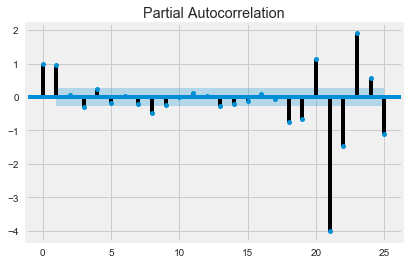

In [64]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(usa_time['National_Income_Top_1'],lags=25)
plt.show()

### Comparing other countries

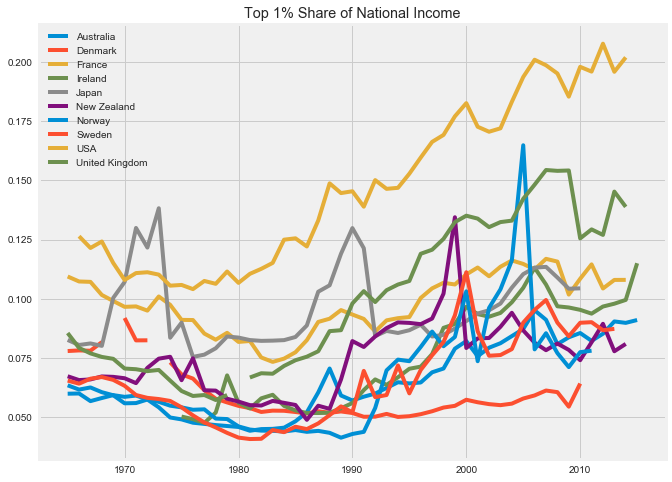

In [27]:
years = data_df.Year.unique()
plt.figure(figsize=(10, 8))
for country in countries:
    plt.plot(years, data_df[data_df['Country'] == country]
             .National_Income_Top_1)

plt.legend(countries)
plt.title('Top 1% Share of National Income')
plt.show()

In [65]:
data_df.head()

,Country,Year,National_Income_Top_1
0,Australia,1965,0.0634
1,Australia,1966,0.0616
2,Australia,1967,0.0625
3,Australia,1968,0.0605
4,Australia,1969,0.0592


In [68]:
tax_src_df = pd.read_csv(path + 'tax_revenue_sources.csv')

tax_src_df = tax_src_df[tax_src_df['Country'].isin(countries)]

/Users/bradpanzarella/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
temp = tax_src_df[tax_src_df['Indicator'] == 'Tax revenue as % of GDP'].head()
temp = temp[['Country', 'Year', 'Value']]
temp.columns = ['Country', 'Year', 'GDP_rate']
temp.head()

,Country,Year,GDP_rate
1506,Australia,1965,20.620
1507,Australia,1966,19.840
1508,Australia,1967,20.419
1509,Australia,1968,20.349
1510,Australia,1969,20.691


In [97]:
total = tax_src_df[tax_src_df['TAX'] == 'TOTALTAX']

In [94]:
total

,GOV,Level of government,TAX,Tax revenue,VAR,Indicator,COU,Country,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1965,1965,AUD,Australian Dollar,9,Billions,NaN,NaN,5.024,NaN,NaN
1,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1966,1966,AUD,Australian Dollar,9,Billions,NaN,NaN,5.389,NaN,NaN
2,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1967,1967,AUD,Australian Dollar,9,Billions,NaN,NaN,5.960,NaN,NaN
3,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1968,1968,AUD,Australian Dollar,9,Billions,NaN,NaN,6.661,NaN,NaN
4,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1969,1969,AUD,Australian Dollar,9,Billions,NaN,NaN,7.631,NaN,NaN
5,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1970,1970,AUD,Australian Dollar,9,Billions,NaN,NaN,8.506,NaN,NaN
6,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1971,1971,AUD,Australian Dollar,9,Billions,NaN,NaN,9.720,NaN,NaN
7,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1972,1972,AUD,Australian Dollar,9,Billions,NaN,NaN,10.650,NaN,NaN
8,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1973,1973,AUD,Australian Dollar,9,Billions,NaN,NaN,13.560,NaN,NaN
9,NES,Total,TOTALTAX,Total tax revenue,TAXNAT,Tax revenue in national currency,AUS,Australia,1974,1974,AUD,Australian Dollar,9,Billions,NaN,NaN,17.531,NaN,NaN
